# Customer Segmentation Analysis Using K-Means Clustering for Enhanced Marketing Strategies

## Explanation of Clustering
Clustering is a technique used in machine learning and data mining that involves grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar to each other than to those in other groups. It's a method of unsupervised learning, and a common technique for statistical data analysis used in many fields.

## Applications of Clustering:

Market Segmentation: Identify distinct groups in a market to target them with tailored marketing strategies.
Social Network Analysis: Detect communities within a large group of social media users or similar groups.
Search Result Grouping: Improve the relevance of search engine results by grouping similar results.
Medical Imaging: Detect and group similar tissues or anomalies in medical imaging data.
Anomaly Detection: Grouping unusual data points separately from the norm can help in detecting fraud, network breaches, or malfunctioning equipment.

## Project Introduction
This project involves customer segmentation using an unsupervised machine learning technique known as K-Means clustering. The data set is specifically tailored for understanding customer segmentation, also referred to as market basket analysis. The goal is to segment customers based on similarities in certain key metrics, which can then inform targeted marketing strategies.

## Project Objectives
From the notebook analysis, the objectives of this project are:

- **Understand Customer Behavior:** Analyze the dataset to understand various attributes of customers, including age, annual income, and spending scores.
- **Segmentation of Customers:** Utilize K-means clustering to segment customers into distinct groups based on their purchasing behavior and demographics.
- **Optimization of Marketing Strategies:** Based on the clustering, derive insights that can be used to tailor marketing strategies to specific customer groups, enhancing the effectiveness of marketing efforts.
- **Determine Optimal Cluster Count:** Use the elbow method to determine the most appropriate number of clusters that captures the inherent groupings in the dataset.

## Conclusion
From the analysis conducted in the notebook, several key insights were gleaned about the customer base. Customers were segmented into distinct groups based on their spending behavior and other attributes, such as age and annual income. The visualization of these clusters helped in understanding the characteristics of each group, which is crucial for targeted marketing campaigns. The elbow method proved effective in determining an optimal number of clusters, ensuring the segments were neither too broad nor too finely divided.

This clustering approach allows marketers to craft customized strategies for each segment, potentially increasing customer satisfaction and business performance. Through further analysis and refinement of the clustering parameters, even more nuanced insights could be achieved to enhance strategic decision-making.

In [26]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D

In [4]:
#Loads the dataset from a CSV file into a pandas DataFrame and displays the first few rows.
df = pd.read_csv(r"Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#Provides descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset’s distribution.
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
#Checks for missing values in each column of the DataFrame.
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
#Outputs information about the DataFrame including the data types of each column and non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
#Renames specific columns for easier access and displays the first few rows to confirm changes.
df.rename(columns={"Annual Income (k$)":"AnnualIncome", "Spending Score (1-100)":"SpendingScore"}, inplace=True)
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


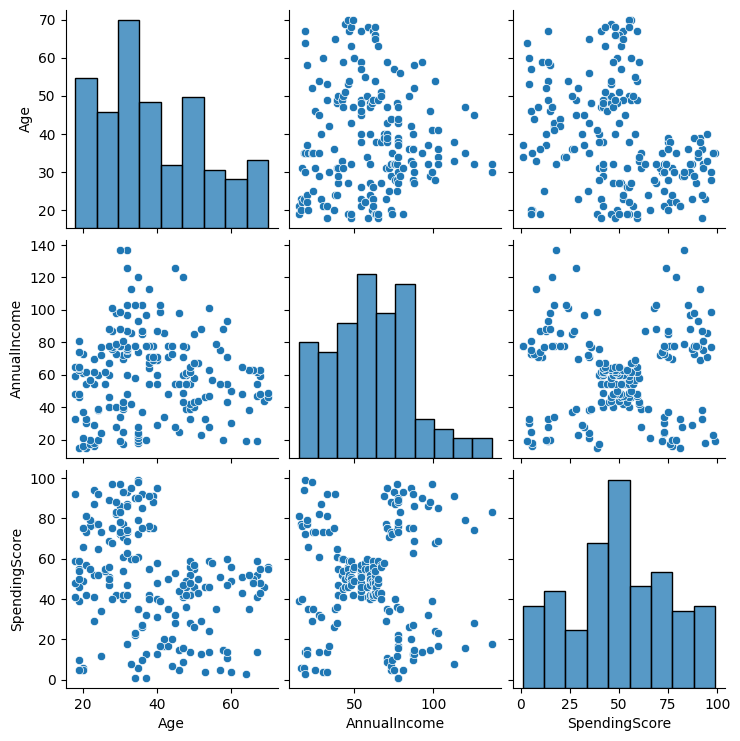

In [9]:
#Creates a pairplot that helps in understanding the bivariate relationships between 'Age', 'AnnualIncome', and 'SpendingScore'.
sns.pairplot(df[['Age','AnnualIncome','SpendingScore']])
plt.show()

Text(0.5, 1.0, 'Annual Income vs Income Score')

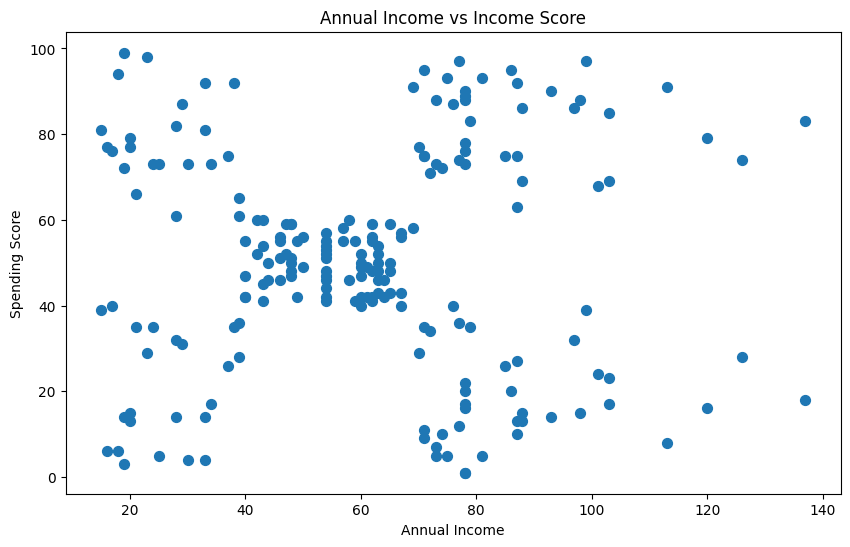

In [10]:
#Displays a scatter plot to visualize the relationship between 'AnnualIncome' and 'SpendingScore'.
plt.figure(figsize = (10,6))
plt.scatter(df['AnnualIncome'], df['SpendingScore'], s = 50)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Income Score')

In [11]:
#Applies the elbow method to find the optimal number of clusters based on WCSS (within-cluster sums of squares).
X = df[['AnnualIncome', 'SpendingScore']]
wcss= []

for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

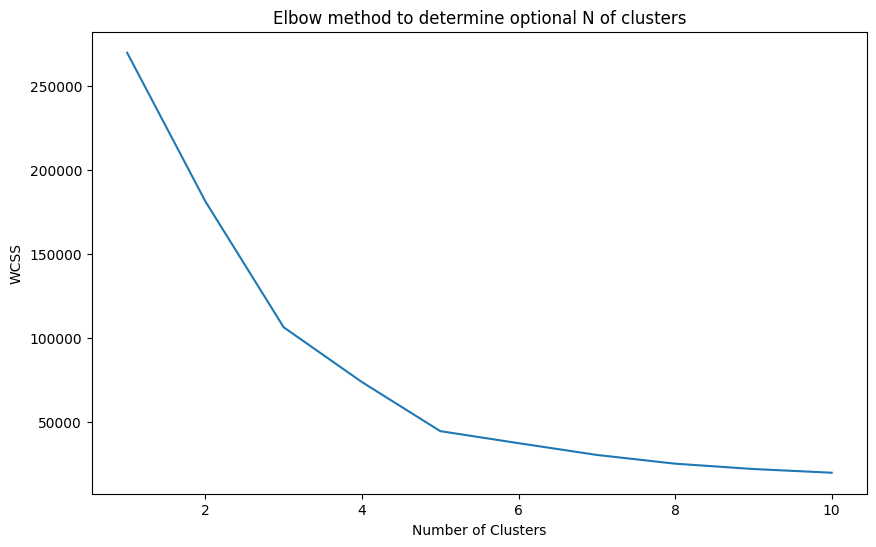

In [12]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow method to determine optional N of clusters')
plt.show()

In [13]:
#Performs K-means clustering with an optimal cluster count determined previously and adds the cluster assignments to the DataFrame.
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [14]:
df['Cluster'] = y_kmeans
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


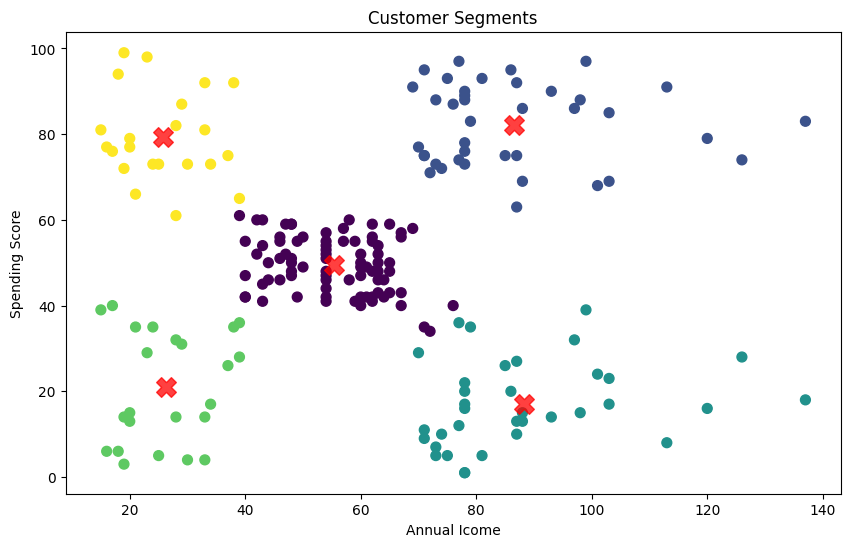

In [15]:
#Visualizes the clusters in a 2D scatter plot, highlighting cluster centers.
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('Annual Icome')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.show()

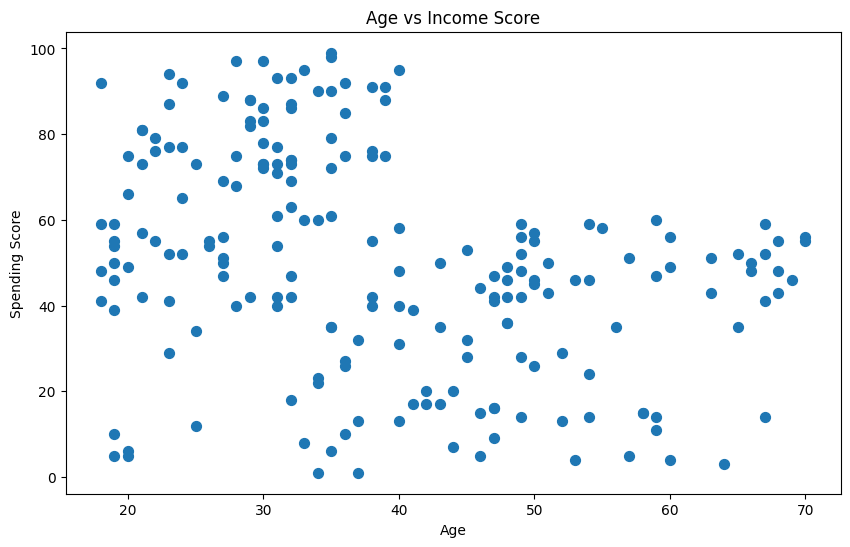

In [16]:
plt.figure(figsize = (10,6))
plt.scatter(df['Age'], df['SpendingScore'], s = 50)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs Income Score')
plt.show()

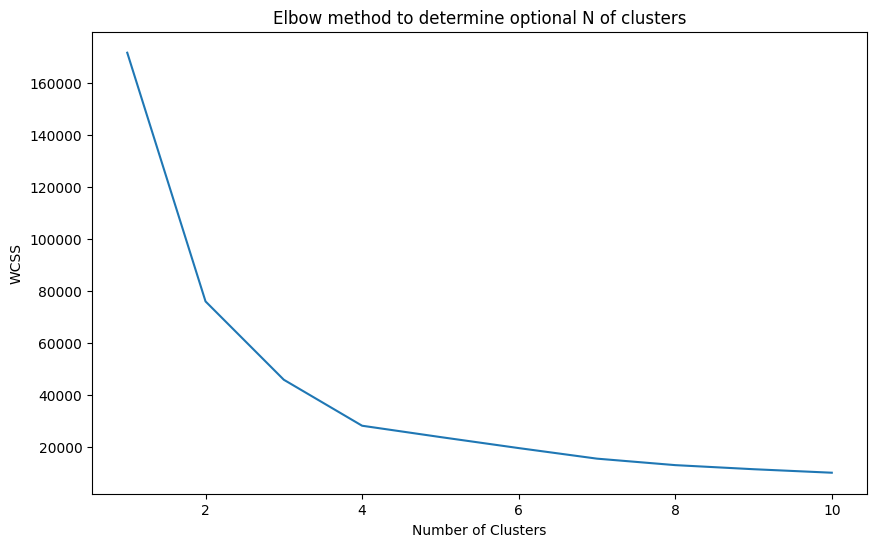

In [17]:
X = df[['Age', 'SpendingScore']]
wcss= []

for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow method to determine optional N of clusters')
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
df['ClusterAge'] = y_kmeans
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster,ClusterAge
0,1,Male,19,15,39,3,3
1,2,Male,21,15,81,4,1
2,3,Female,20,16,6,3,2
3,4,Female,23,16,77,4,1
4,5,Female,31,17,40,3,3


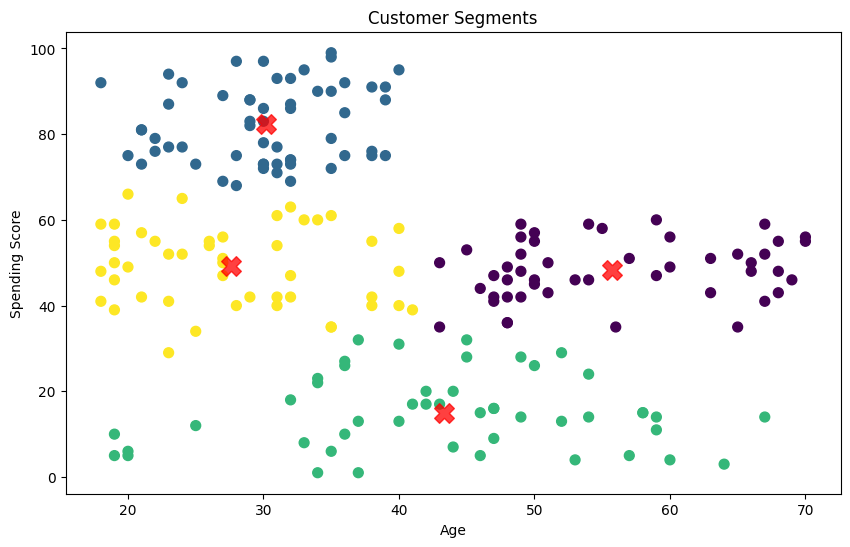

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.show()

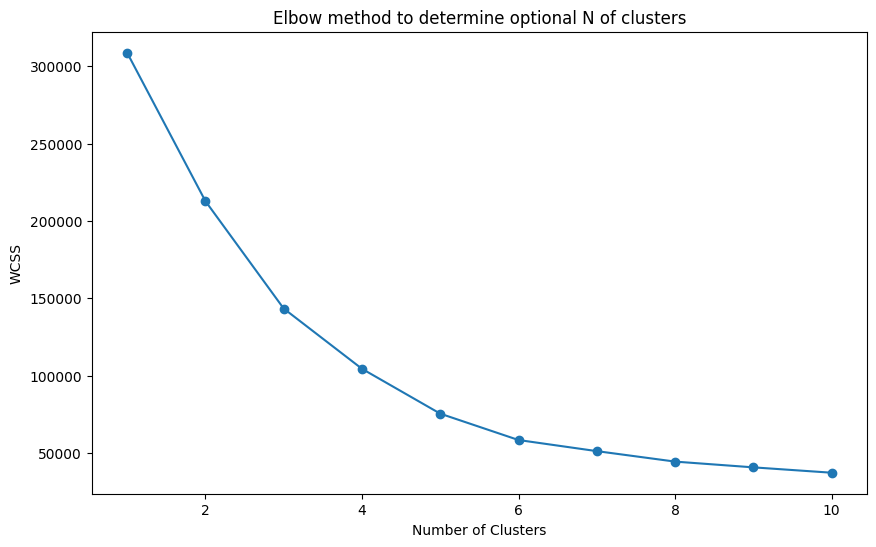

In [20]:
X = df[['Age', 'AnnualIncome', 'SpendingScore']]

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow method to determine optional N of clusters')
plt.show()

In [21]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

df['ClusterAgeIncomeSpend'] = y_kmeans

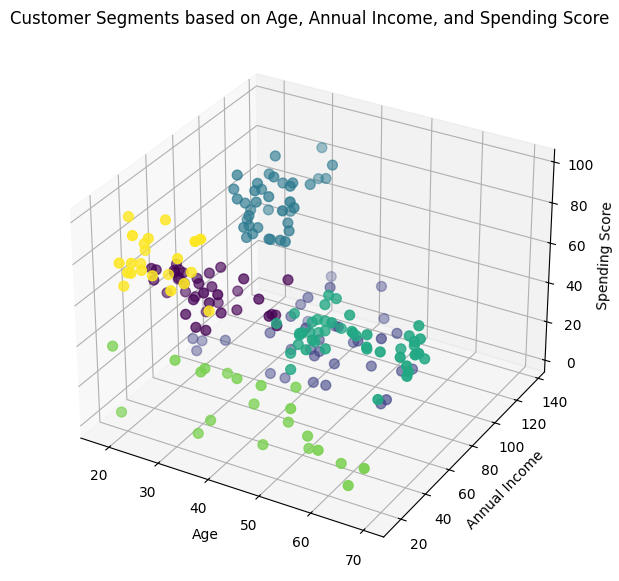

In [31]:
fig = plt.figure(figsize = (10,7))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['AnnualIncome'], df['SpendingScore'], c=df['ClusterAgeIncomeSpend'], s = 50, cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

plt.title('Customer Segments based on Age, Annual Income, and Spending Score')
plt.show()